# Libraries

In [22]:
import torch
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.nn.functional as F

In [2]:
from mnist_model import MnistModel
from dataloaders import Loaders

# Visualizing Dataset

In [3]:
mnist = MNIST(root="./dataset/", download=False, train=True)
img, label = mnist[5]

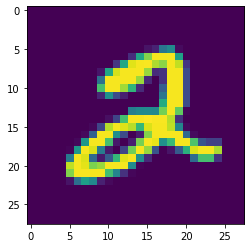

In [4]:
plt.imshow(img);

In [5]:
mnist = MNIST(root="./dataset/", download=False, train=False, transform=transforms.ToTensor())
img, label = mnist[3]

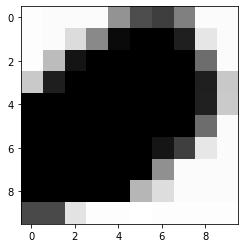

In [6]:
plt.imshow(img[0, 10:20, 10:20], cmap='gray')

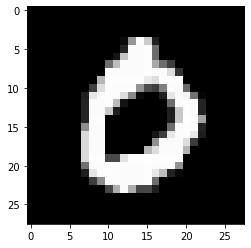

In [7]:
plt.imshow(img[0, :, :], cmap='gray')

In [8]:
label

0

# Dry run and Model setup

In [9]:
model = MnistModel()

In [11]:
train_loader, validation_loader, test_loader = Loaders()


Training samples:  51000
Validation Samples:  9000
Test Samples:  10000 



In [46]:
for X, y in train_loader:
    predictions = model(X)
    print(predictions.shape)
    probabilities = F.softmax(predictions, dim=1)
    print(probabilities.shape)
    maximum_probabilities, predicted_classes = torch.max(probabilities, 1)
    print("First 5 Predicted Classes: ", predicted_classes[:5])
    print("First 5 Actual Classes: ", y[:5])
    print("Accuracy: ", (torch.sum(predicted_classes == y) / predicted_classes.shape[0]).item()*100)
    loss = F.cross_entropy
    loss_val = loss(predictions, y)
    print("Loss: ", loss_val)
    break

torch.Size([128, 10])
torch.Size([128, 10])
First 5 Predicted Classes:  tensor([9, 6, 7, 6, 6])
First 5 Actual Classes:  tensor([3, 8, 7, 7, 9])
Accuracy:  15.625
Loss:  tensor(2.3159, grad_fn=<NllLossBackward0>)


In [45]:
torch.max

<function _VariableFunctionsClass.max>